In [1]:
import proveit.specialStatementMagic # for %begin_axioms and %end_axioms
from proveit.expression import Operation
from proveit.basiclogic import Forall, In, Equals
from proveit.number import Add, Subtract, Multiply, Exponentiate, Fraction, Abs, LessThanEquals, Mod, Round
from proveit.number.common import e, i, one, two, pi, two_pi, Integers, Reals
from proveit.trigonometry import AngDiff
from proveit.linalg import MatrixProd, ScalarProd, SU
from proveit.statistics import Prob
from proveit.physics.quantum import Bra, Ket, Meas
from proveit.physics.quantum.QFT import QFT
# Note that U_, u_, and t_ are Literals that will eventually be converted to
# Variable counterparts through meta-reasoning.
from proveit.physics.quantum.QPE.common import U_, n_, u_, phase_, t_, Psi_, m_, phase_m_, b_, delta_, two_pow_t
from proveit.physics.quantum.QPE import QPE, PhaseEst
from proveit.physics.quantum.QPE.phaseEstOps import Psuccess, Pfail, Alpha, ModAdd
from proveit.common import U, u, t, eps, a, b, l
from IPython.display import display

In [2]:
%begin_axioms

Let $U$ be a unitary operator that acts on $n$ qubits, $u$ an eigenstate of U with eigenvalue $e^{i \varphi}$:

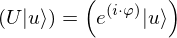

In [3]:
unitaryU = In(U_, SU(n_))
eigenUu = Equals(MatrixProd(U_, Ket(u_)), ScalarProd(Exponentiate(e, Multiply(i, phase_)), Ket(u_)))
display(unitaryU)
display(eigenUu)  

Define the Quantum Phase Estimation algorithm, for any U, u, and number of registers, using quantum circuit representations and recursion:

In [4]:
Forall((U, t), QPE(U, t)) # TODO

Let $\lvert \Psi \rangle$ be the outcome of the $t$-qubit register of ${\rm QPE}(U, t)$ acting on $\lvert u \rangle$, $m$ be a random variable representing the measurement of Psi with the register interpretted as an integer (via binary representation), and $\varphi_m = 2 \pi m/2^t$ be the random variable phase outcome of ${\rm QPE}(U, t)$:

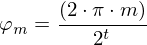

In [5]:
PsiDef = Equals(Ket(Psi_), MatrixProd(QPE(U_, t_), Ket(u_)))
mDef = Equals(m_, Meas(Ket(Psi_)))
phase_m_def = Equals(phase_m_, Fraction(Multiply(two, pi, m_), two_pow_t))
display(PsiDef)
display(mDef)
display(phase_m_def)

The probability of success is defined as $\theta_m$ being within some epsilon of $\theta$: 

In [6]:
successDef = Forall(eps, Equals(Psuccess(eps), Prob(LessThanEquals(Abs(AngDiff(phase_m_, phase_)), eps))), domain=Reals)
failDef = Forall(eps, Equals(Pfail(eps), Subtract(one, Psuccess(eps))), domain=Reals)
display(successDef)
display(failDef)             

Let $b$ be the best value for $m$, minimizing the difference between $\varphi$ and $\varphi_m$, and let $\delta$ be this difference.  Let $\alpha_l$ be the amplitude of $\lvert \Psi \rangle$ for the $b \oplus l$ state, where $\oplus$ is defined as addition modulo $2^t$:

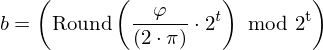

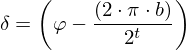

In [7]:
bestDef = Equals(b_, Mod(Round(Multiply(Fraction(phase_, two_pi), two_pow_t)), two_pow_t))
deltaDef = Equals(delta_, Subtract(phase_, Fraction(Multiply(two, pi, b_), two_pow_t)))
modAddDef = Forall((a, b), Equals(ModAdd(a, b), Mod(Add(a, b), two_pow_t)), domain=Integers)
alphaDef = Forall(l, Equals(Alpha(l), MatrixProd(Bra(ModAdd(b_, l)), Ket(Psi_))), domain=Integers)
display(bestDef)
display(deltaDef)
display(modAddDef)
display(alphaDef)

In [8]:
%end_axioms

Creating axioms *.dill and *.pv_it files in the __pv_it__ directory
alphaDef has changed.  Replace it? (yes/no/all)a
These axioms may be imported from proveit.physics.quantum.QPE.axioms
